## `K-Means` from scratch!! 🚀 

In [1]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iters=1000, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx]
        
        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for j in range(self.n_clusters):
                new_centroids[j] = np.mean(X[self.labels == j], axis=0)
                
            # Check for convergence
            if np.sum(np.abs(new_centroids - self.centroids)) < self.tol:
                break
                
            self.centroids = new_centroids
            
    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)
        
    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

### Let's create some data to test the Implementation

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


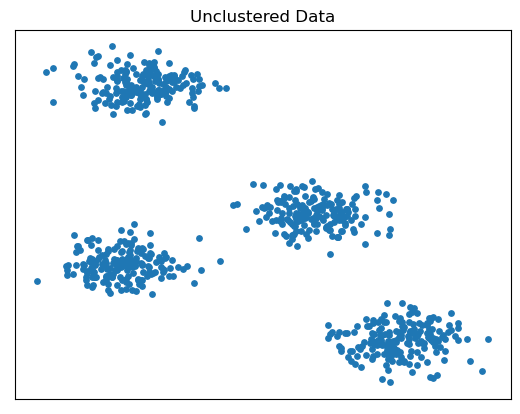

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Specifying the number of cluster our data should have
n_components = 4

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=0.4, random_state=0
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

### Perform K-Means clustering on the above data 🚀 

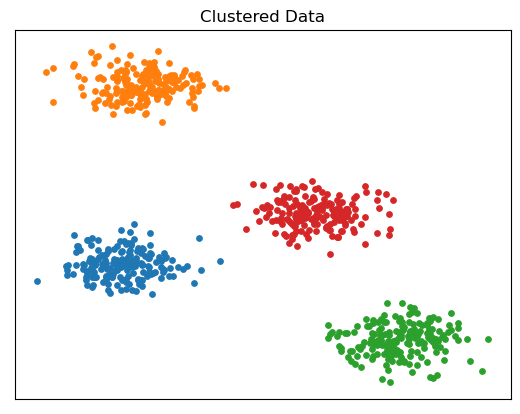

In [3]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4)

# fit the data & predict cluster labels
kmeans.fit(X)
predicted_labels = kmeans.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()